In [ ]:
#Linear regression

import pandas as pd
import numpy as np
import os
from sklearn.metrics import mean_squared_error
from IPython.display import clear_output
from sklearn.preprocessing import StandardScaler

In [ ]:
from matplotlib import pyplot as plt


In [ ]:
%matplotlib inline

In [ ]:
plt.rcParams["figure.figsize"] = (12,5)
plt.style.use('dark_background')

In [ ]:
class liner_regression_():

    def __init__(self):
        pass

        
    def get_loss(self,x,y,coeff):
        yhat =  np.matmul(x,coeff.T)
        mse = mean_squared_error(y,yhat)
        return mse
    
    def train(self,x,y,lr,epochs,early_stop):
        self.sc  = StandardScaler()
        x = self.sc.fit_transform(x)
        x = np.concatenate((np.ones((len(x),1)),x),axis=1)
        print("x array",x[1])
        #initialize coefficients
        self.coeff = np.array([.5]* x.shape[1])
        early_stop_watcher = 0
        
        j_ = []
        loss_= []
        for j in range(epochs):
            grad_dir = np.zeros(self.coeff.shape[0])
            
            for i in range(x.shape[1]):
                a= (np.matmul(x,self.coeff) - y)
                grad_dir[i] = (lr/x.shape[0])*np.sum(a*x[:,i])

            loss = self.get_loss(x,y,self.coeff)
            self.coeff -= grad_dir
            j_.append(j)
            loss_.append(loss)
            
            if j%50 ==0:
                clear_output(wait=True)
                plt.plot(j_,loss_)
                plt.title("Linear Regression Loss")
                plt.xlabel("Epochs")
                plt.ylabel("Training Loss")
                
                plt.pause(0.05)
            
            self.loss = loss
            
            if len(loss_) > 10:
                if abs(loss - loss_[-2]) < .001:
                    early_stop_watcher +=1

                    if early_stop_watcher == early_stop:
                        break
                else:
                    #lr /=10.
                    early_stop_watcher =0

            
            

## Linear Regression from Scratch - Gradient Descent 

### Load Data

In [16]:
data = np.loadtxt("airfoil_self_noise.dat")

x = data[:,:5]
y = data[:,5]

data[:5]

array([[8.00000e+02, 0.00000e+00, 3.04800e-01, 7.13000e+01, 2.66337e-03,
        1.26201e+02],
       [1.00000e+03, 0.00000e+00, 3.04800e-01, 7.13000e+01, 2.66337e-03,
        1.25201e+02],
       [1.25000e+03, 0.00000e+00, 3.04800e-01, 7.13000e+01, 2.66337e-03,
        1.25951e+02],
       [1.60000e+03, 0.00000e+00, 3.04800e-01, 7.13000e+01, 2.66337e-03,
        1.27591e+02],
       [2.00000e+03, 0.00000e+00, 3.04800e-01, 7.13000e+01, 2.66337e-03,
        1.27461e+02]])

### Linear Regression from Scratch

In [17]:
lr_model= liner_regression_()

### Train model - Linear Regression with Loss Plot

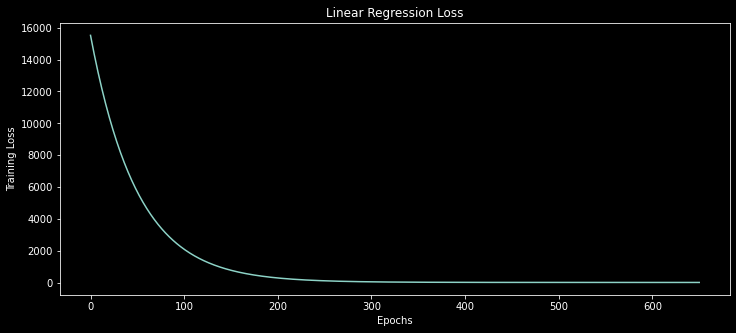

In [18]:

lr_model.train(x,y,lr=.01,epochs=1000,early_stop=5)


In [19]:
print("Custom model Training Loss : ", lr_model.loss)
print("Custom model Coefficient Values",lr_model.coeff)

Custom model Training Loss :  23.173012527456756
Custom model Coefficient Values [124.68034582  -3.91778338  -1.88956841  -3.05412663   1.47737456
  -2.35603533]


In [20]:
from sklearn.linear_model import LinearRegression

sk_lr_model = LinearRegression()

sk_lr_model.fit(x,y)

print("SkLearn model Training Loss : ",mean_squared_error(y,sk_lr_model.predict(x)))
print("SkLearn model Coefficient Values",lr_model.coeff)

SkLearn model Training Loss :  23.032747260592338
SkLearn model Coefficient Values [124.68034582  -3.91778338  -1.88956841  -3.05412663   1.47737456
  -2.35603533]
